In [1]:
import sys
sys.path.append('..')
from tool import *

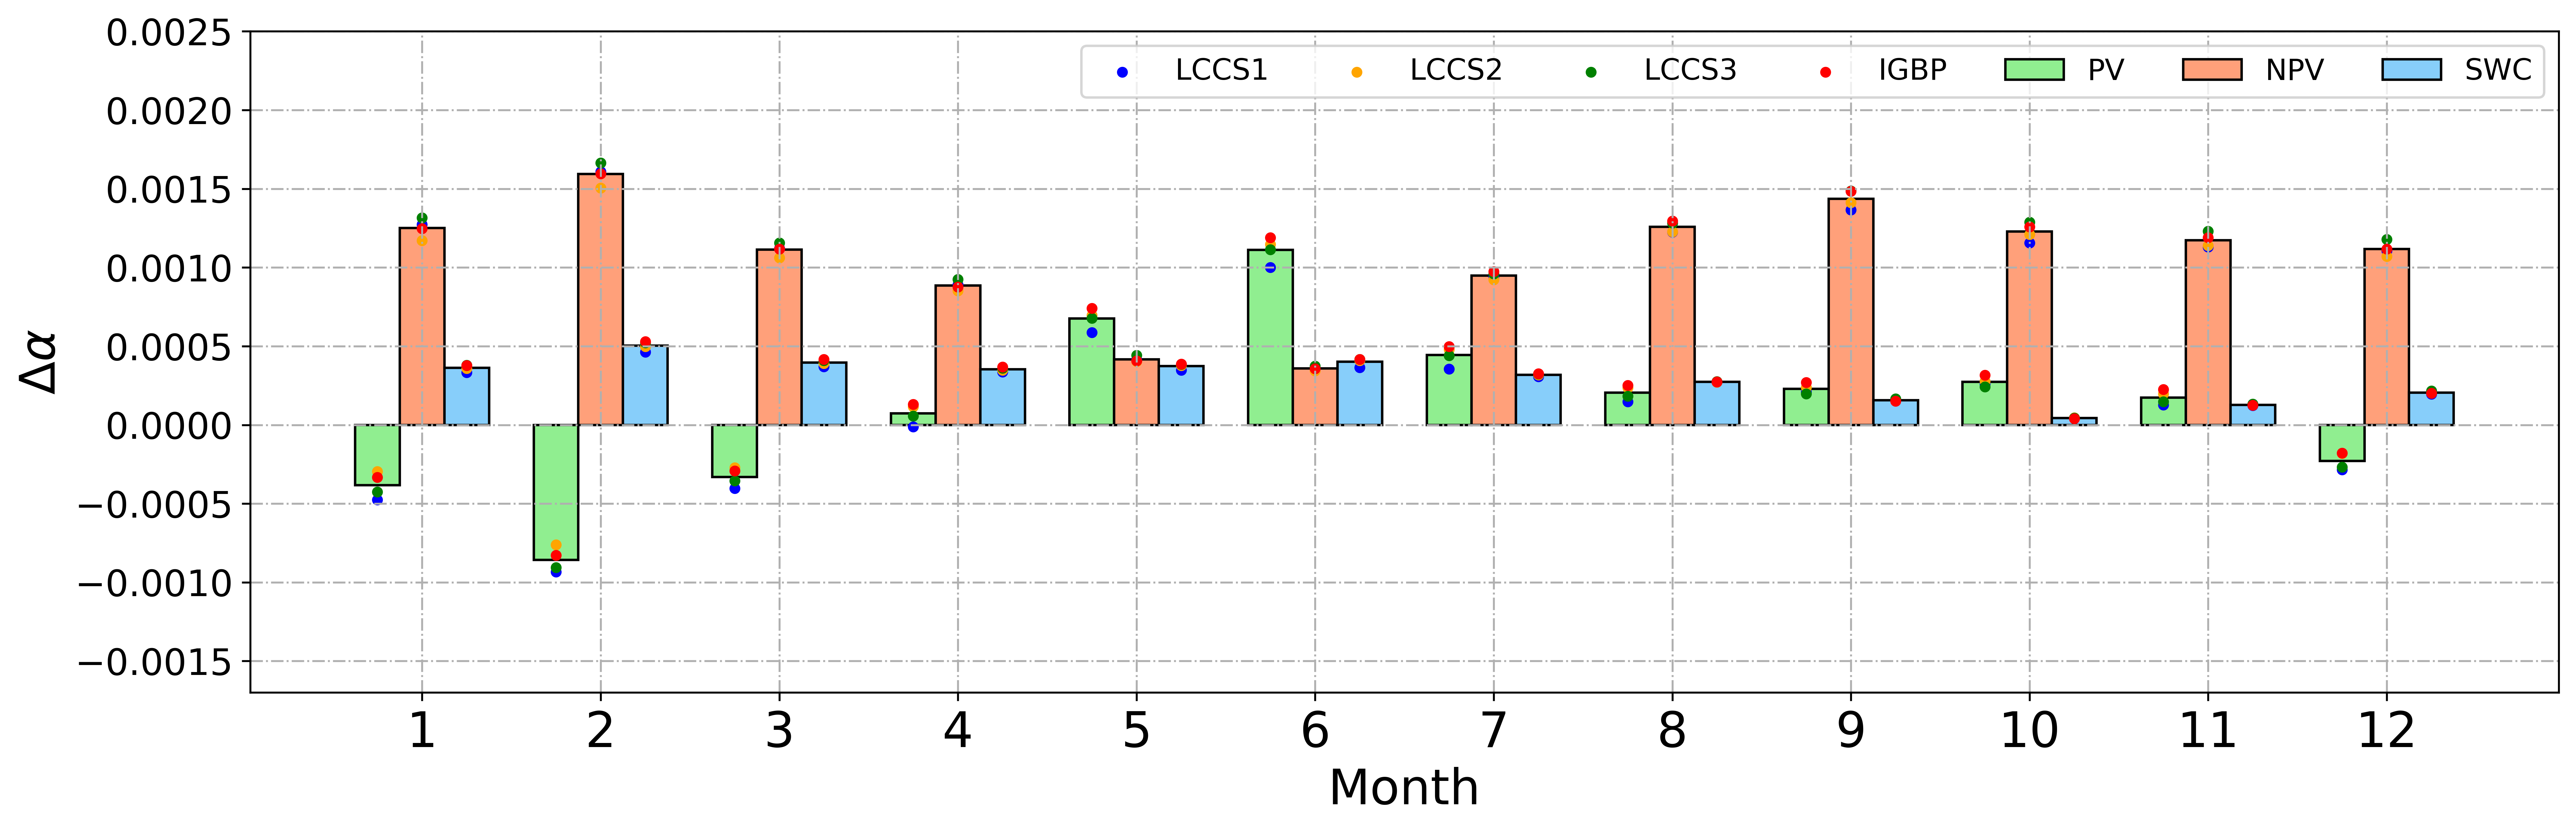

In [3]:
# Monthly contribution of PV, NPV and SWC to GLMA
dd_all={}
for i in ['NDVI','SSI','NMDI']:
    dd_all[i]=[]
for landcover_type in ['LCCS1','LCCS2','LCCS3','IGBP']:
    dd=torch.load(f'../data/seasons_model_dict_{landcover_type}.pth')
    for i in ['NDVI','SSI','NMDI']:
        dd_all[i].append(dd[i])
for i in ['NDVI','SSI','NMDI']:
    dd_all[i]=np.stack(dd_all[i])
plt.figure(figsize=(17,5),dpi=600)
x = range(12)
plt.grid(linestyle='-.')
x=[x,[i + 0.25 for i in x],[i + 0.5 for i in x]]
plt.bar(x[0], np.mean(dd_all['NDVI'],axis=0), width=0.25,color='lightgreen',edgecolor='black',label='PV')
plt.bar(x[1], np.mean(dd_all['SSI'],axis=0), width=0.25, color='lightsalmon',edgecolor='black',label='NPV')
plt.bar(x[2], np.mean(dd_all['NMDI'],axis=0), width=0.25, color='lightskyblue',edgecolor='black',label='SWC')
plt.scatter(x[0],dd_all['NDVI'][0], color='b',label='LCCS1',s=12)
plt.scatter(x[0],dd_all['NDVI'][1], color='orange',label='LCCS2',s=12)
plt.scatter(x[0],dd_all['NDVI'][2], color='g',label='LCCS3',s=12)
plt.scatter(x[0],dd_all['NDVI'][3], color='r',label='IGBP',s=12)
plt.scatter(x[1],dd_all['SSI'][0], color='b',s=12)
plt.scatter(x[1],dd_all['SSI'][1], color='orange',s=12)
plt.scatter(x[1],dd_all['SSI'][2], color='g',s=12)
plt.scatter(x[1],dd_all['SSI'][3], color='r',s=12)
plt.scatter(x[2],dd_all['NMDI'][0], color='b',s=12)
plt.scatter(x[2],dd_all['NMDI'][1], color='orange',s=12)
plt.scatter(x[2],dd_all['NMDI'][2], color='g',s=12)
plt.scatter(x[2],dd_all['NMDI'][3], color='r',s=12)
plt.legend()
plt.xticks([i + 0.25 for i in x[0]], list(range(1,13)),fontsize=20)
plt.legend(fontsize=12,ncol=7)
plt.ylim((-0.0017, 0.0025))
plt.yticks(fontsize=15)
plt.ylabel(r'$\Delta \alpha$',fontsize=20)
plt.xlabel(r'Month',fontsize=20)
plt.savefig(f'../figure/season_model_mean.pdf',dpi=600,bbox_inches='tight')
plt.show()

LCCS1


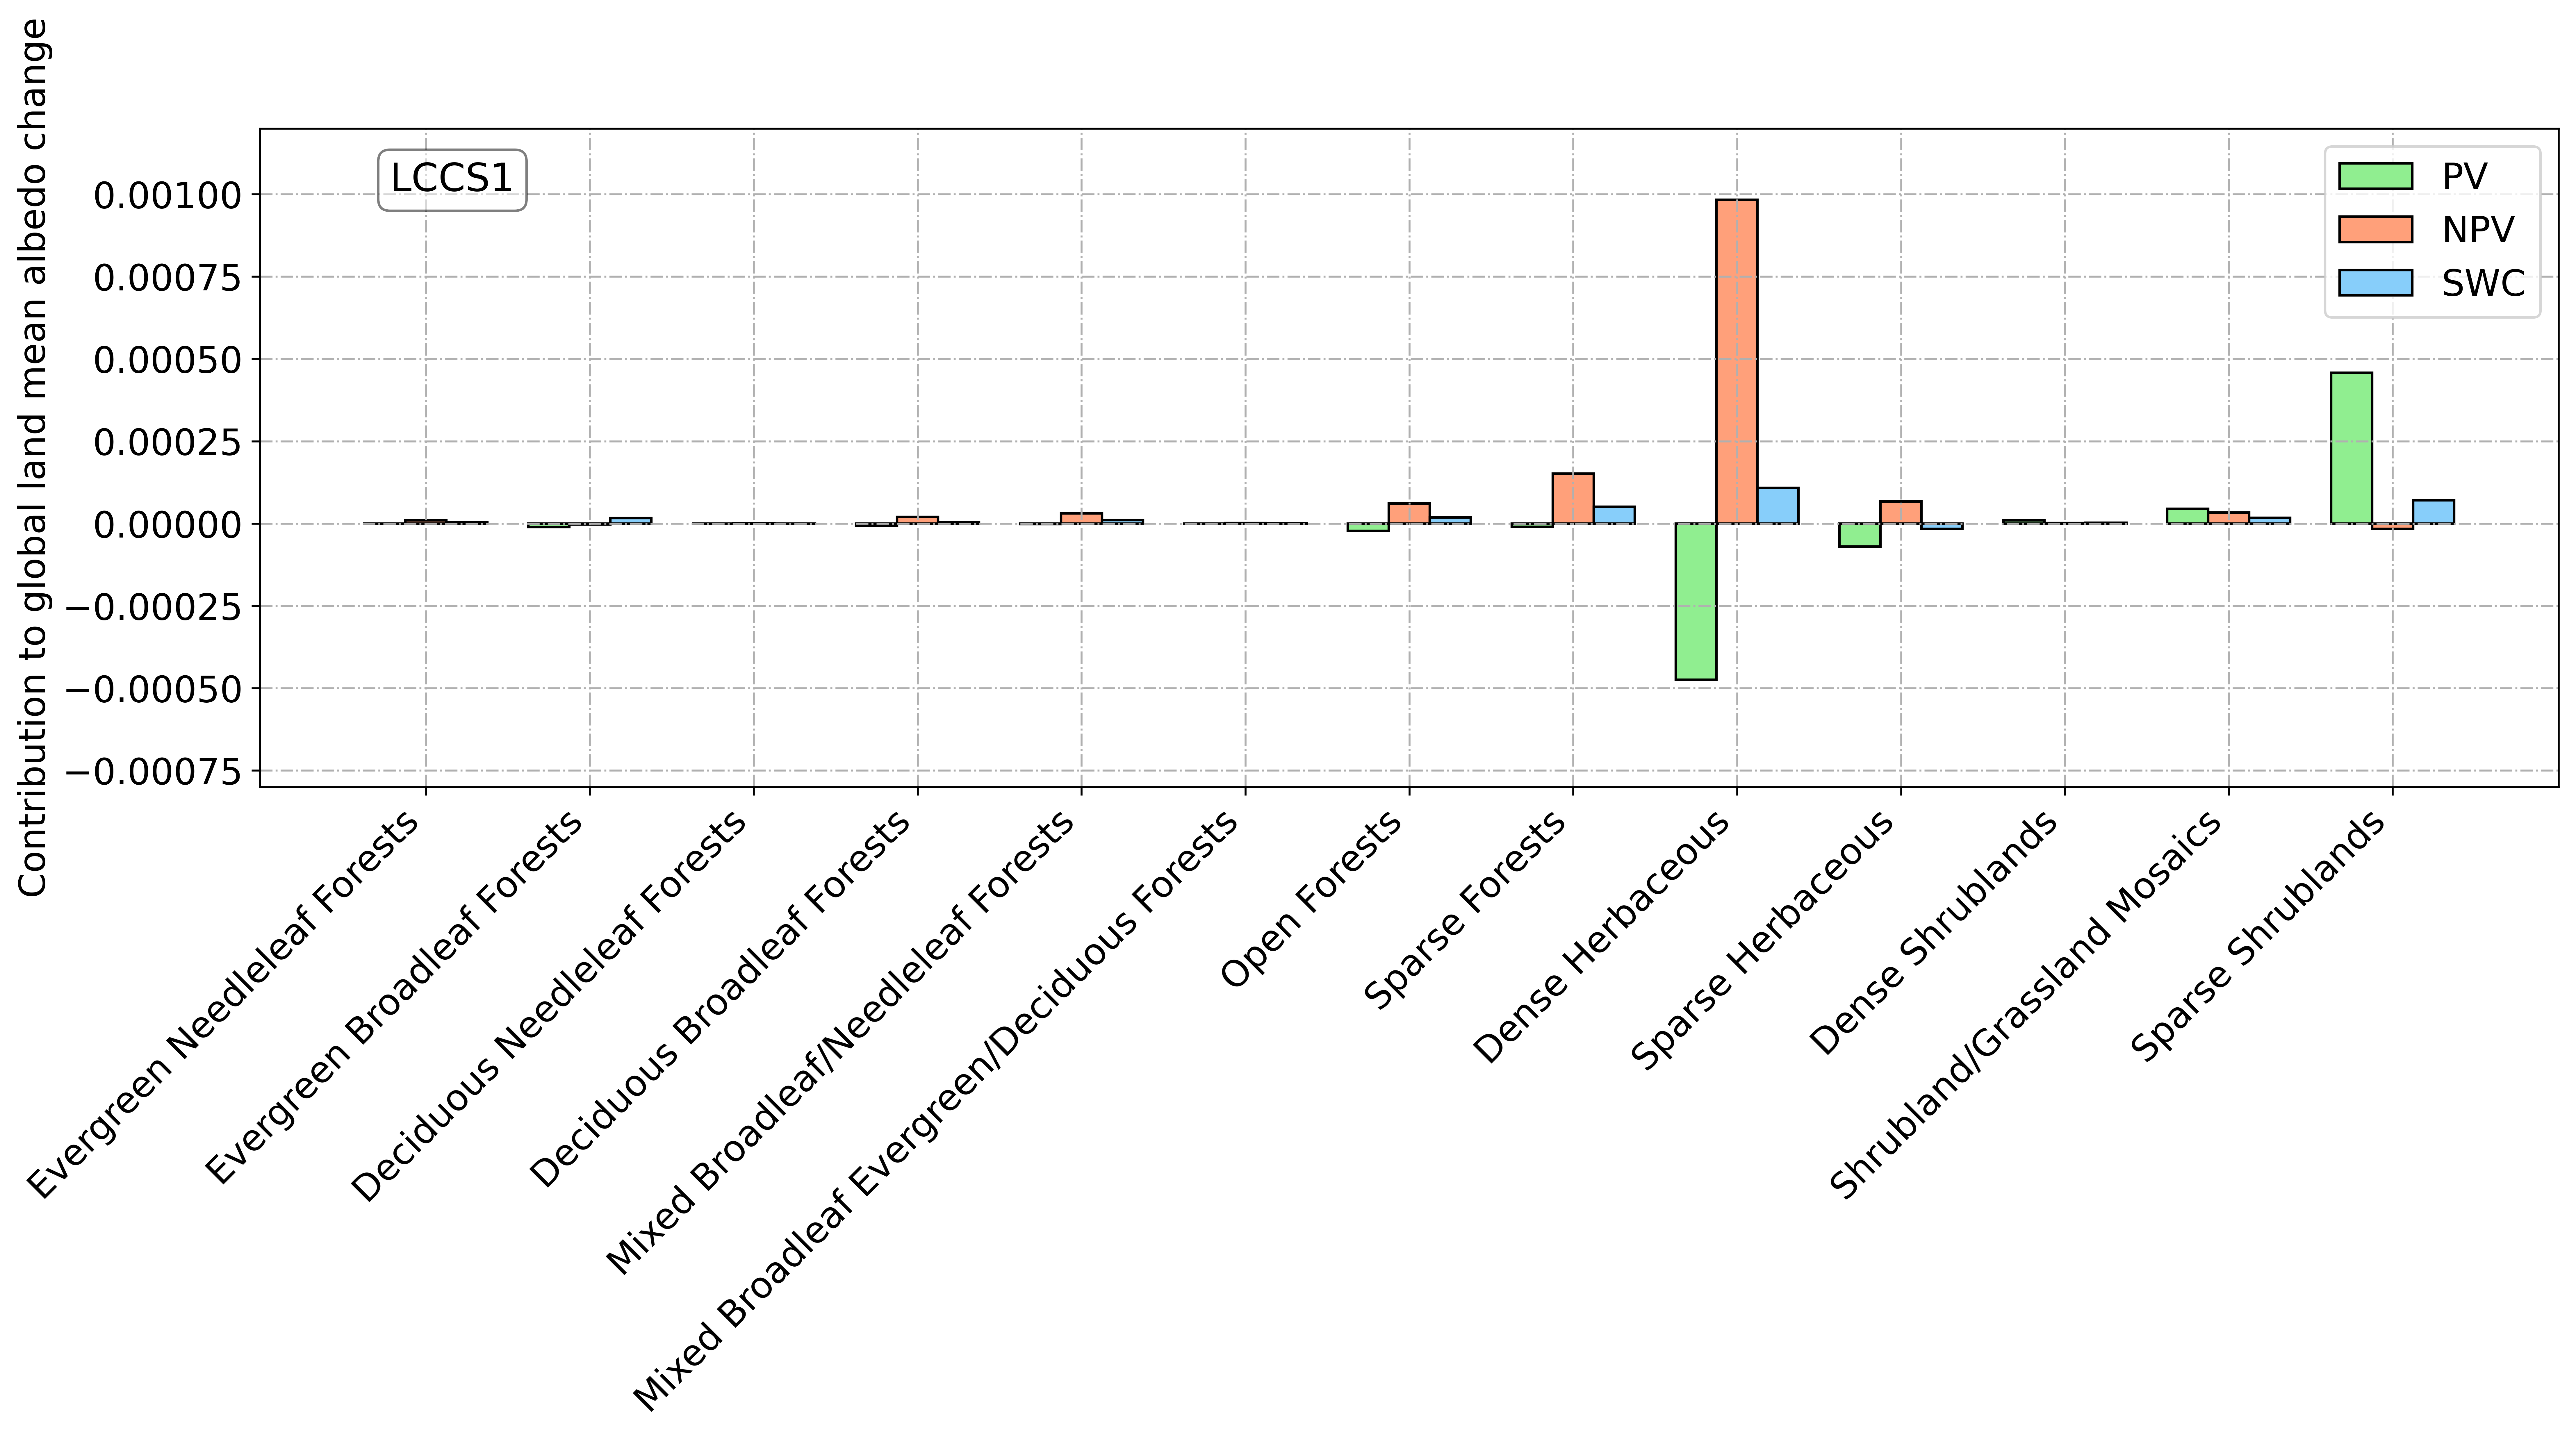

LCCS2


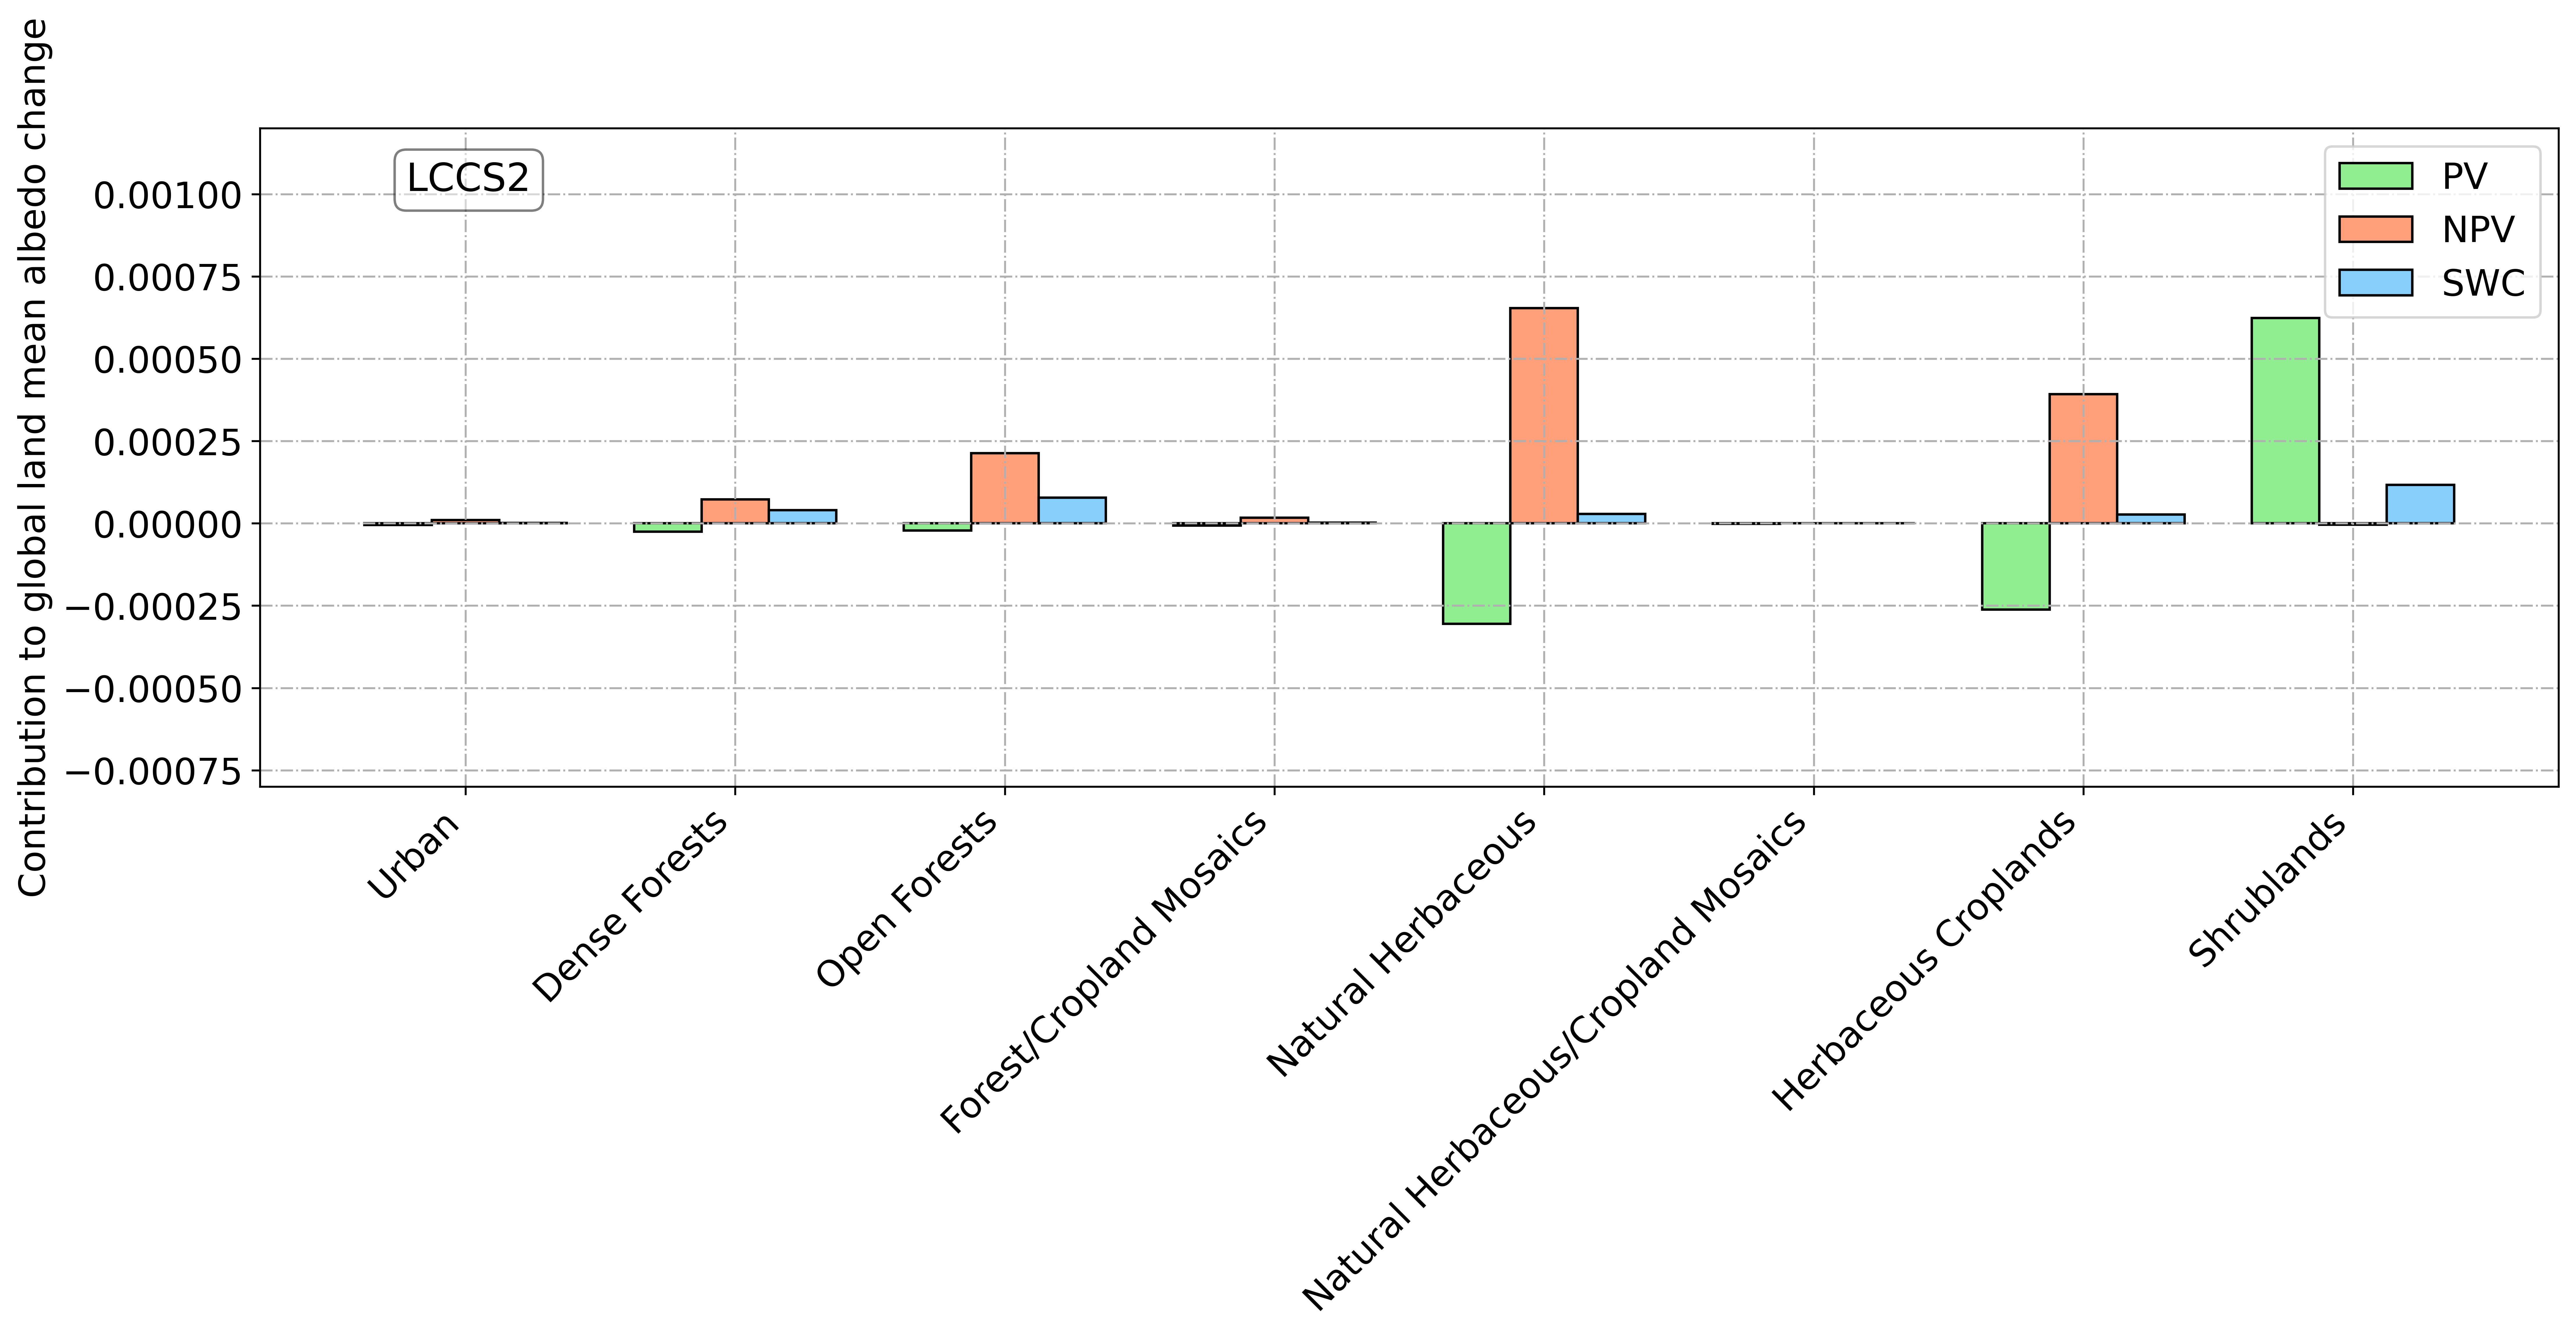

LCCS3


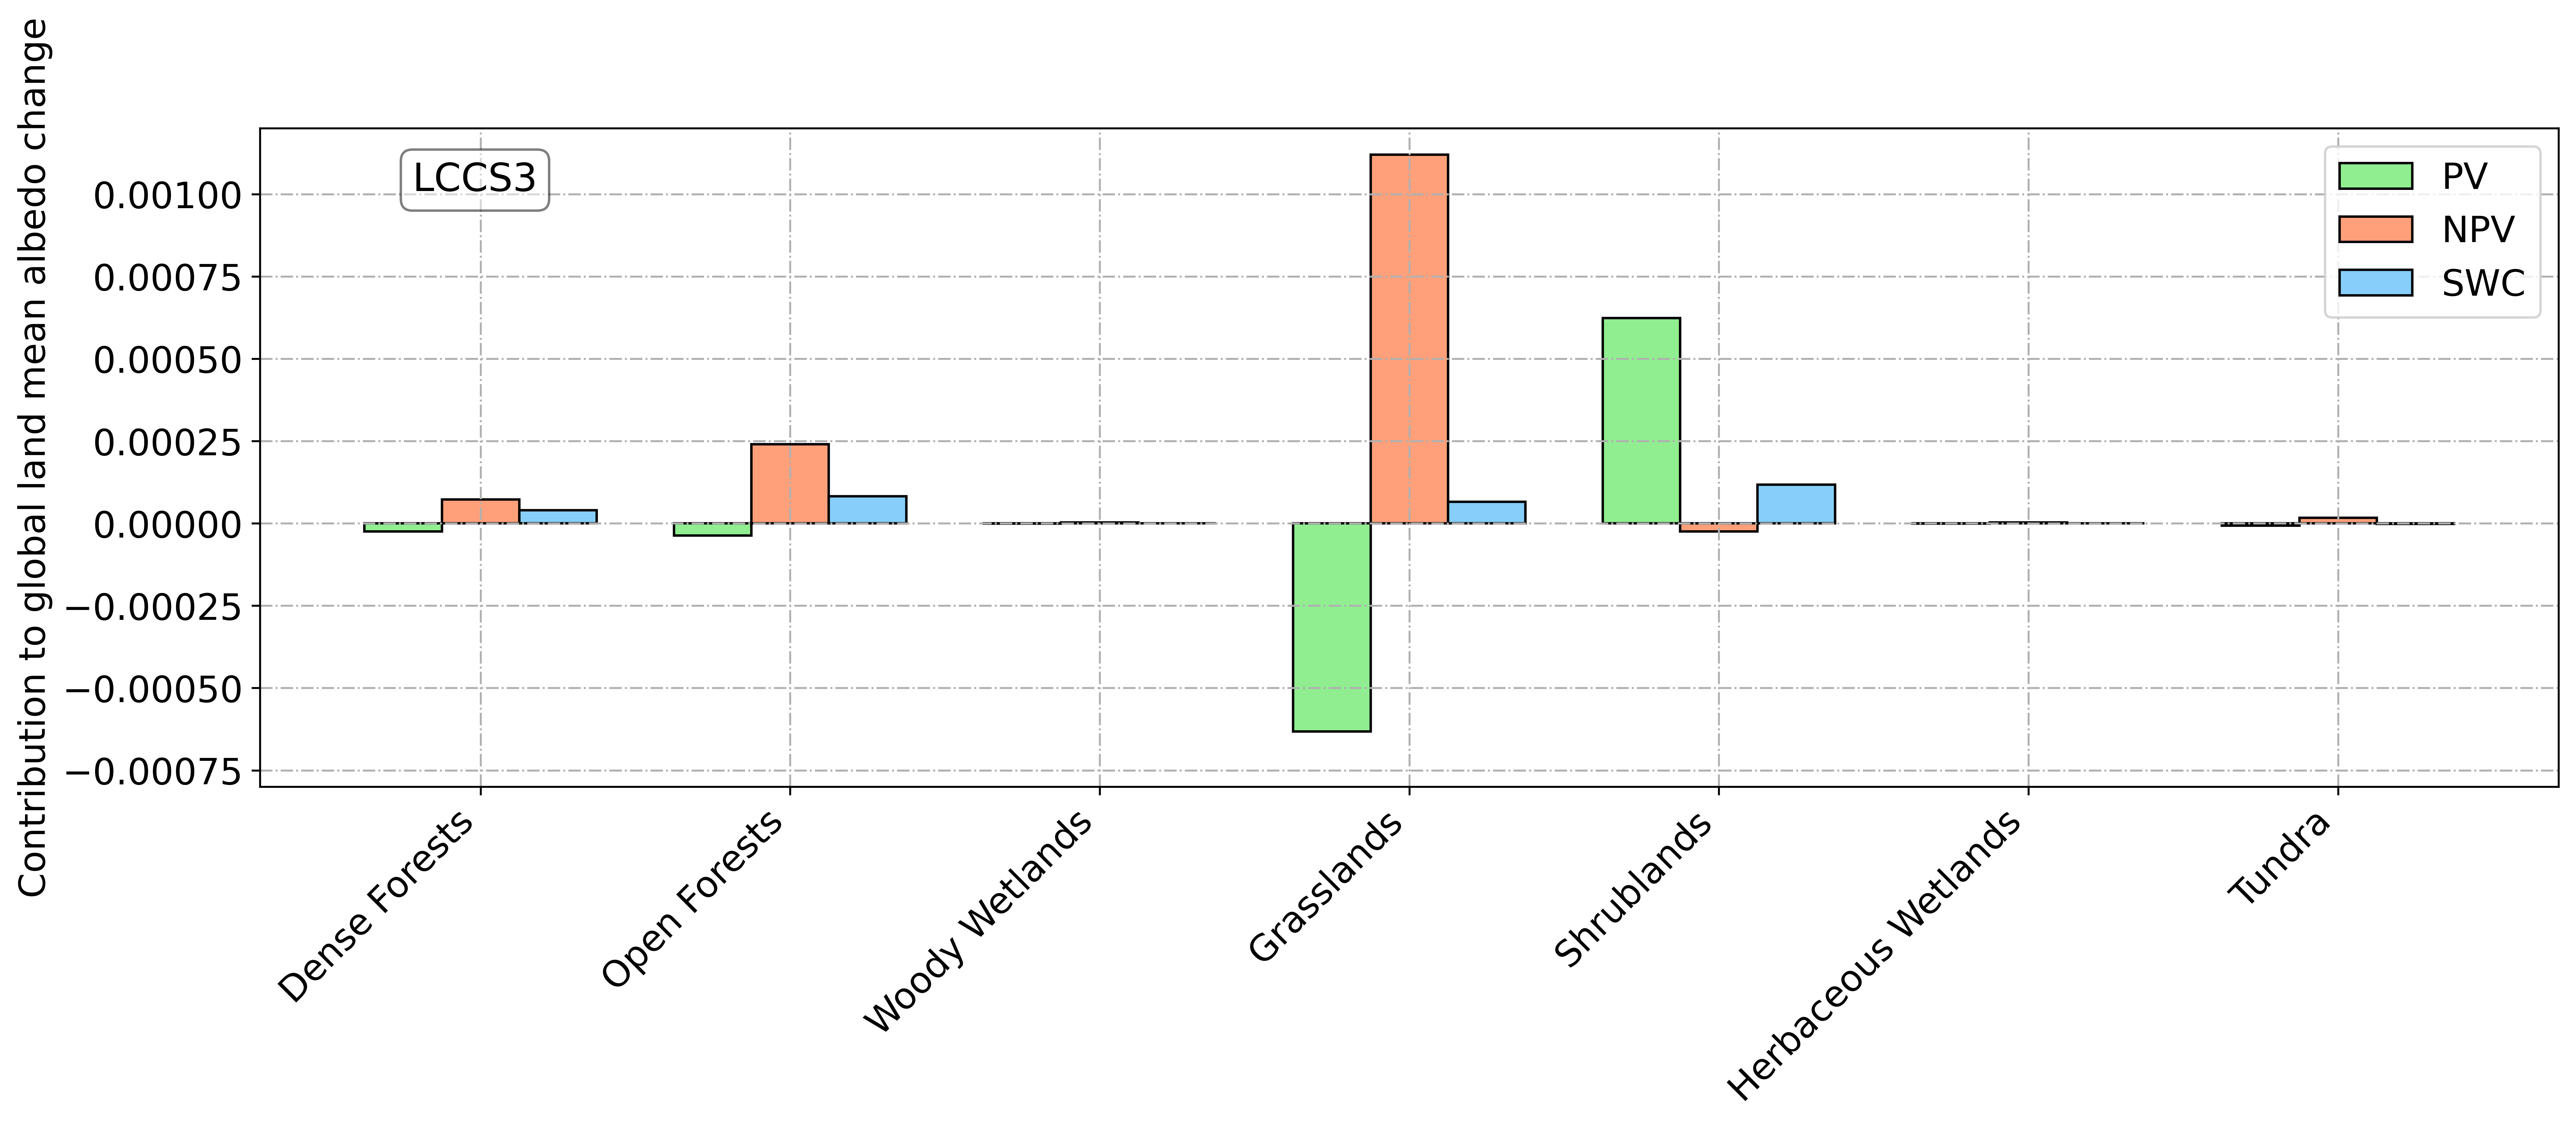

IGBP


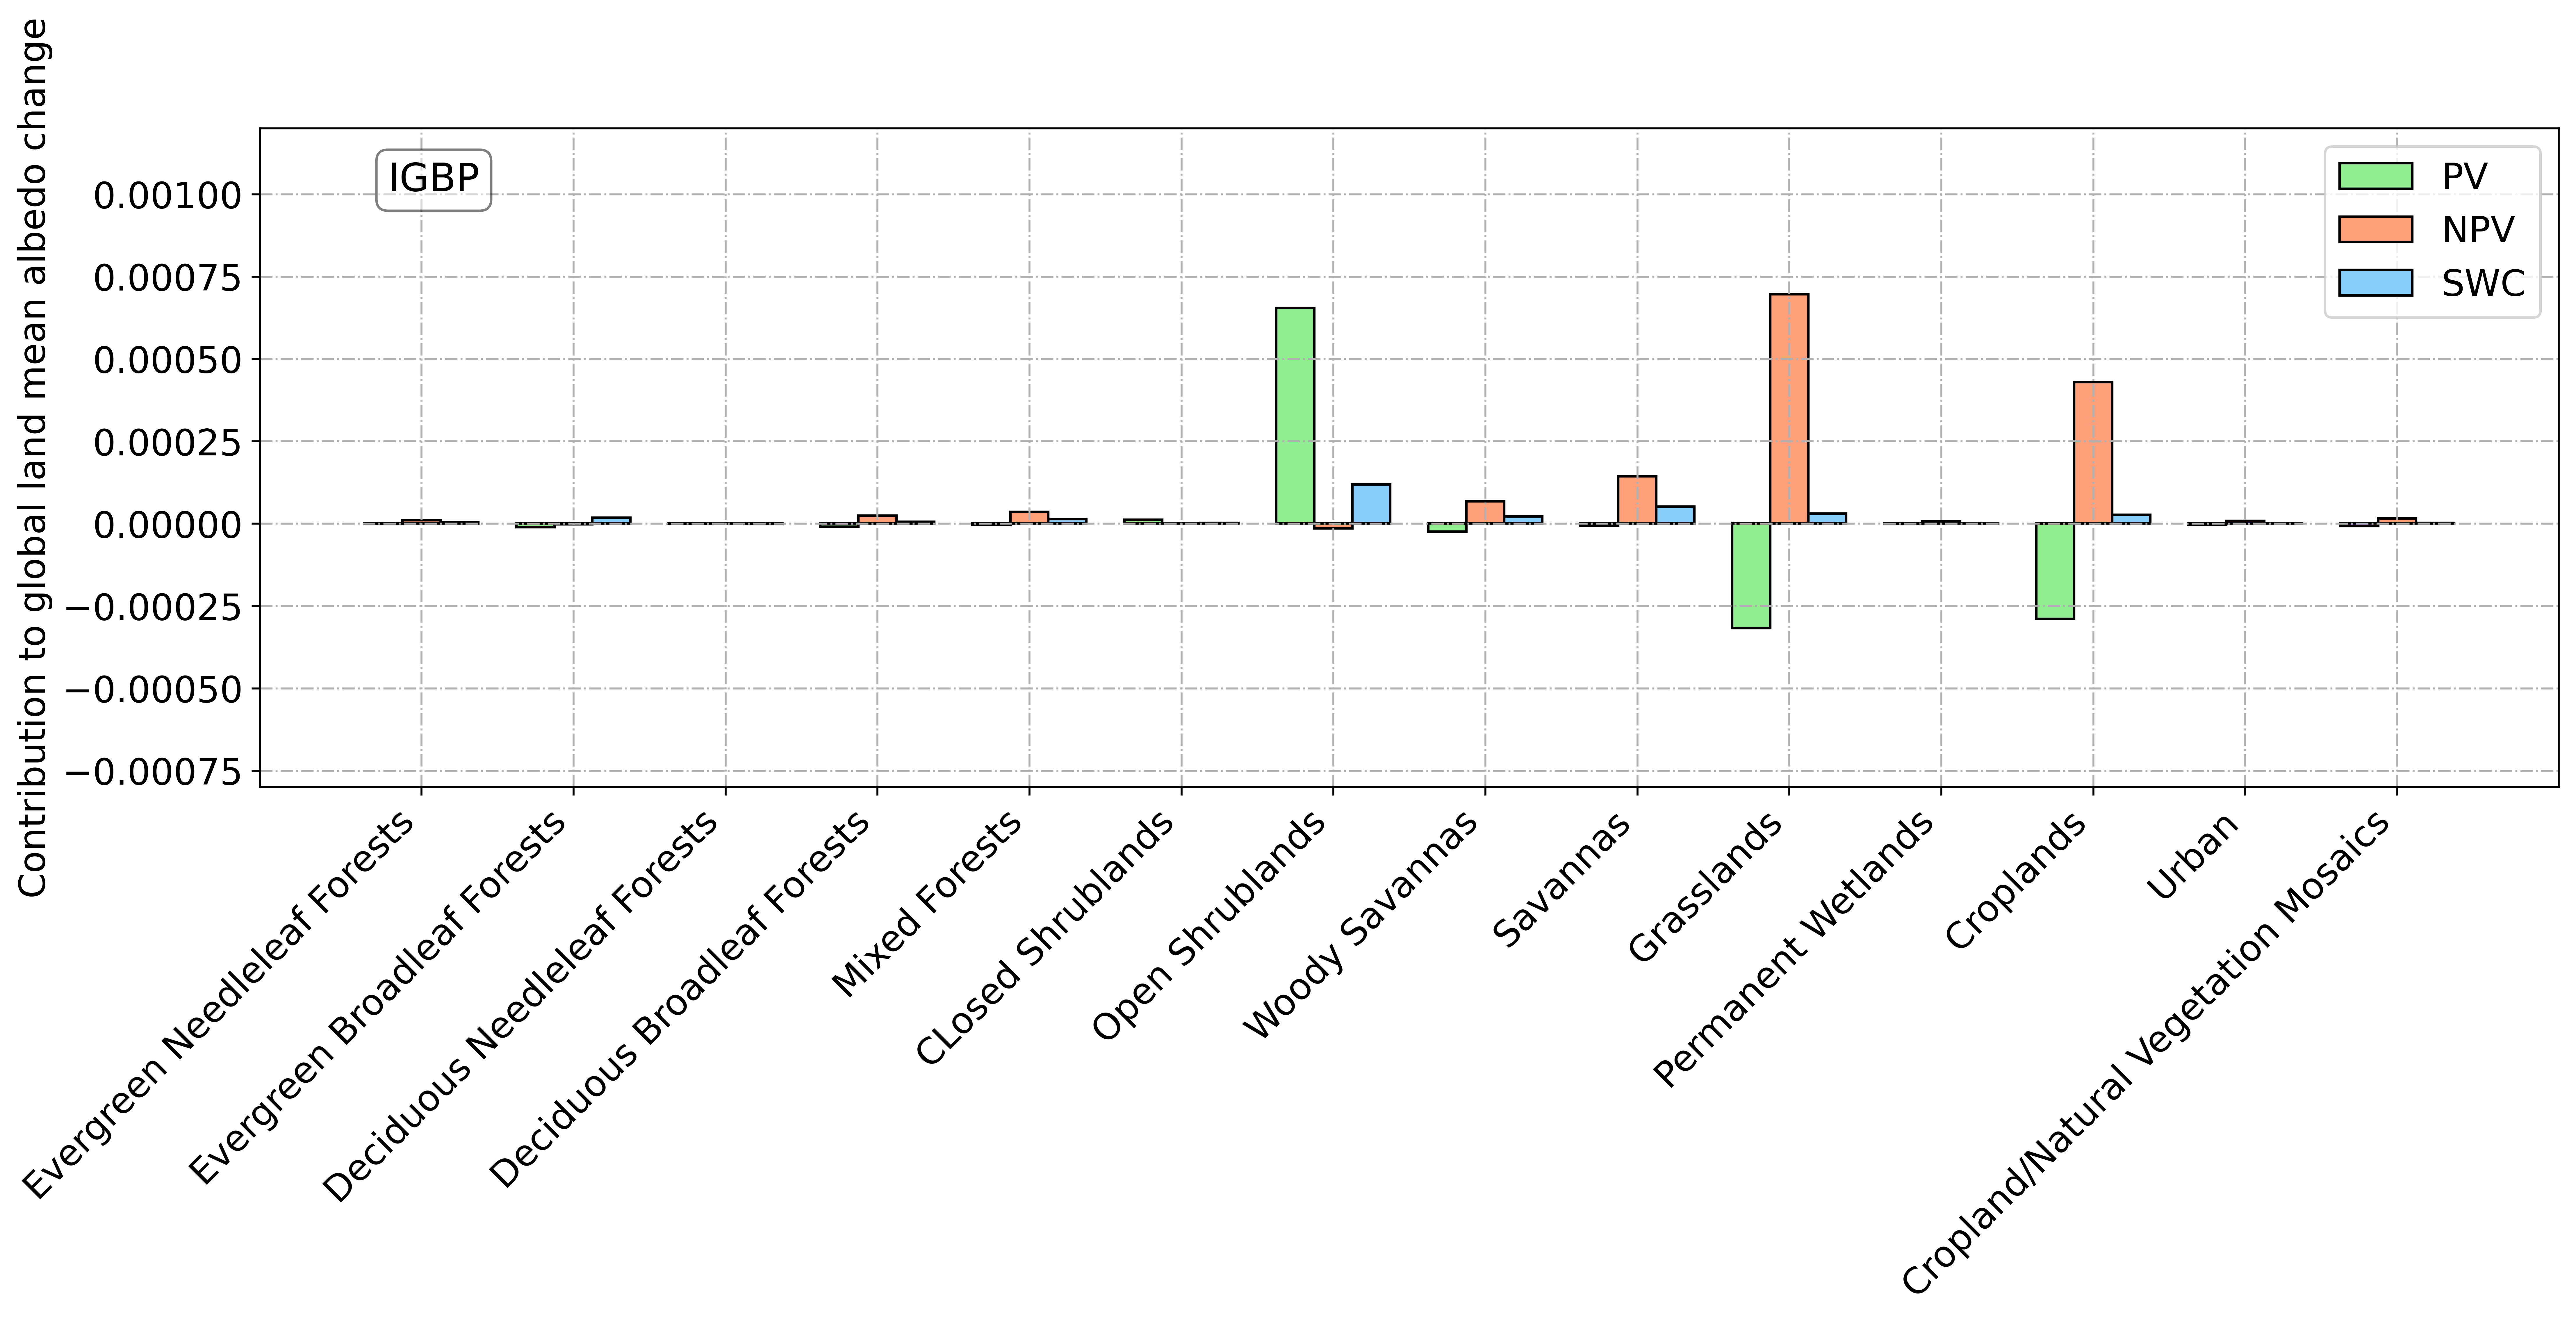

In [4]:
# Contribution of PV, NPV and SWC to GLMA over different LULC types
for landcover_type in ['LCCS1','LCCS2','LCCS3','IGBP']:
    result={}
    print(landcover_type)
    if landcover_type=='LCCS2':
        lc_len=10
    elif landcover_type=='LCCS3':
        lc_len=9
    elif landcover_type=='IGBP':
        lc_len=16
    elif landcover_type=='LCCS1':
        lc_len=15 
    result=torch.load(f'../data/type_model_dict_{landcover_type}.pth')
    names=[type_code[landcover_type][i] for i in range(len(result['NDVI'])) if result['NDVI'][i]!=0]
    cc_kernel=[]
    for b in ['NDVI','SSI','NMDI']:
        cc_kernel.append([i for i in result[b] if i!=0])
    plt.figure(figsize=(17,5),dpi=600)
    x = range(len(names))
    plt.grid(linestyle='-.')
    plt.bar(x, cc_kernel[0], width=0.25,color='lightgreen',edgecolor='black',label='PV')
    plt.bar([i + 0.25 for i in x], cc_kernel[1], width=0.25, color='lightsalmon',edgecolor='black',label='NPV')
    plt.bar([i + 0.5 for i in x], cc_kernel[2], width=0.25, color='lightskyblue',edgecolor='black',label='SWC')
    plt.legend()
    plt.xticks([i + 0.25 for i in x], names,fontsize=15,rotation=45,horizontalalignment='right')
    plt.text(0.03, 0.0011, landcover_type, fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
    plt.legend(fontsize=15)
    plt.ylim((-0.0008, 0.0012))
    plt.yticks(fontsize=15)
    plt.ylabel(r'Contribution to global land mean albedo change',fontsize=15)
    plt.savefig(f'../figure/type_model_{landcover_type}.pdf',dpi=600,bbox_inches='tight')
    plt.show()

In [1]:
# Contribution of PV, NPV and SWC to GLMA
for landcover_type in ['LCCS1','LCCS2','LCCS3','IGBP']:
    print(landcover_type)
    if landcover_type=='LCCS2':
        lc_len=10
    elif landcover_type=='LCCS3':
        lc_len=9
    elif landcover_type=='IGBP':
        lc_len=16
    elif landcover_type=='LCCS1':
        lc_len=15 
    k=[]
    for i in range(40076):
        k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    lc01=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2001_{landcover_type}_v2.tif').read(1)
    lc20=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2020_{landcover_type}_v2.tif').read(1)
    lc01[lc01==100]=20
    lc01[lc01==0]=20
    lc20[lc20==100]=20
    lc20[lc20==0]=20
    z=np.zeros(lc01.shape)
    z[lc01==lc20]=lc01[lc01==lc20]
    if landcover_type=='IGBP':
        for i in [2,16,20]:
            z[lc01==i]=0
    else:
        for i in [1,2,20]:
            z[lc01==i]=0
    lc01[lc01==20]=0
    lc01[lc20==20]=0
    lc01[lc01!=0]=1
    landarea=np.array(k).reshape(-1,1)*lc01
    del lc01,lc20,k
    gc.collect()
    print(landarea.sum())
    for b in ['NDVI','SSI','NMDI']:
        result_b=[]
        print(b)
        img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_final.tif').read(1)
        img[np.isnan(img)]=0
        img[z==0]=0
        img2=landarea*img
        print(b,img2.sum()/landarea.sum())
        print(b,img2[:int(img2.shape[0]/2)].sum()/landarea.sum())
        print(b,img2[int(img2.shape[0]/2):].sum()/landarea.sum())
        del img2,img
        gc.collect()

LCCS1
144957696680213.12
NDVI
NDVI -8.676561758663453e-05
NDVI -0.0008892899550878156
NDVI 0.0008025243375011661
SSI
SSI 0.0013408938756351197
SSI 0.0013168320175180608
SSI 2.40618581170499e-05
NMDI
NMDI 0.0002869143354956261
NMDI 4.24123916082665e-05
NMDI 0.0002445019438873605
LCCS2
144959207957221.62
NDVI
NDVI -3.8078553384977716e-06
NDVI -0.0009299780704109074
NDVI 0.0009261702150724083
SSI
SSI 0.0013548863483108435
SSI 0.0013652322764266026
SSI -1.0345928115776714e-05
NMDI
NMDI 0.0002935754739426096
NMDI 1.7255491948201353e-05
NMDI 0.00027631998199440644
LCCS3
144957696680213.12
NDVI
NDVI -7.807725242128894e-05
NDVI -0.0010131794304370713
NDVI 0.0009351021780157842
SSI
SSI 0.0014310935013589464
SSI 0.0014402914531608055
SSI -9.197951801840273e-06
NMDI
NMDI 0.0003048137133160368
NMDI 2.4741830626922928e-05
NMDI 0.00028007188268911506
IGBP
145024722054851.2
NDVI
NDVI -1.0168752996532272e-05
NDVI -0.0010075656684259105
NDVI 0.0009973969154293703
SSI
SSI 0.0014245866016624272
SSI 0.001

In [ ]:
# Contribution of PV, NPV and SWC to GMRF
for landcover_type in ['LCCS1','LCCS2','LCCS3','IGBP']:
    result={}
    print(landcover_type)
    if landcover_type=='LCCS2':
        lc_len=10
    elif landcover_type=='LCCS3':
        lc_len=9
    elif landcover_type=='IGBP':
        lc_len=16
    elif landcover_type=='LCCS1':
        lc_len=15 
    k=[]
    for i in range(40076):
        k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    lc01=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2001_{landcover_type}_v2.tif').read(1)
    lc20=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2020_{landcover_type}_v2.tif').read(1)
    lc01[lc01==100]=20
    lc01[lc01==0]=20
    lc20[lc20==100]=20
    lc20[lc20==0]=20
    z=np.zeros(lc01.shape)
    z[lc01==lc20]=1
    if landcover_type=='IGBP':
        for i in [2,16,20]:
            z[lc01==i]=0
    else:
        for i in [1,2,20]:
            z[lc01==i]=0
    lc01[lc01==20]=0
    lc01[lc20==20]=0
    lc01[lc01!=0]=1
    landarea=np.array(k).reshape(-1,1)*lc01
    del lc01,lc20,k
    gc.collect()
    print(landarea.sum())
    for b in ['NDVI','SSI','NMDI']:
        for key in ['HadGEM2', 'HadGEM3', 'CAM5', 'ECHAM6','ERAI','ERA5']:
            img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_{key}_eg_final.tif').read(1)
            img[np.isnan(img)]=0
            img=landarea*z*img
            # del img
            # gc.collect()
            all_eg=img.sum()/5.1e8/1e6
            n_eg=img[:int(img.shape[0]/2)].sum()/5.1e8/1e6
            s_eg=img[int(img.shape[0]/2):].sum()/5.1e8/1e6
            print(b,key,all_eg)
            print(b,key,n_eg)
            print(b,key,s_eg)
            result[f'{landcover_type}_{b}_{key}_s']=s_eg
            result[f'{landcover_type}_{b}_{key}_n']=n_eg
            result[f'{landcover_type}_{b}_{key}_all']=all_eg
            del img
            gc.collect()
    torch.save(result,f'../data/RF_model_dict_{landcover_type}.pth')

2
0 3


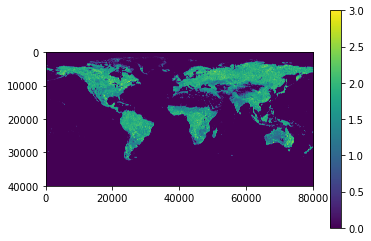

In [1]:
#Maximum impact factor
bb=['NDVI','SSI','NMDI']
imgs=[rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_final.tif').read(1) for b in bb]
print(2)
imgs=np.stack(imgs,axis=0)
imgs=np.abs(imgs)
imgs_id=np.argmax(imgs,axis=0)
for i in range(3):
    imgs_id[imgs[i]==0]=4
    imgs_id[np.isnan(imgs[i])]=4
imgs_id+=1
imgs_id[imgs_id==5]=0
print(imgs_id.min(),imgs_id.max())
plt.imshow(imgs_id)
plt.colorbar()
plt.show()
tif_save(imgs_id,f'/data2/hzy/ssd_hzy/G3/albedo_maxid_final.tif',global_trf,p='4326')

In [1]:
#Maximum impact factor fraction
def main1():
    bb=['NDVI','SSI','NMDI']
    img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/albedo_maxid_final.tif').read(1)
    for i in range(3):
        print(i)
        kkk=signal.convolve2d((img==(i+1)).astype(np.int8),np.ones((20,20)), mode='same', boundary='symm')
        tif_save(kkk,f'/data2/hzy/ssd_hzy/G3/albedo_maxid_count_{bb[i]}_final.tif',global_trf,p='4326')
def main2():
    landcover_type='LCCS2'
    lc01=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2001_LCCS2_v2.tif').read(1)
    lc20=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2020_LCCS2_v2.tif').read(1)
    lc01[lc01==100]=20
    lc01[lc01==0]=20
    lc20[lc20==100]=20
    lc20[lc20==0]=20
    z=np.zeros(lc01.shape)
    z[lc01==lc20]=1
    if landcover_type=='IGBP':
        for i in [2,16,20]:
            z[lc01==i]=0
    else:
        for i in [1,2,20]:
            z[lc01==i]=0
    lc01[lc01==20]=0
    lc01[lc20==20]=0
    lc01[lc01!=0]=1
    del lc01,lc20
    gc.collect()
    bb=['NDVI','SSI','NMDI']
    kkk=[rasterio.open(f'/data2/hzy/ssd_hzy/G3/albedo_maxid_count_{bb[i]}_final.tif').read(1) for i in range(3)]
    kkk=np.stack(kkk)
    kkk_sum=np.sum(kkk,axis=0)
    kkk2=kkk/(kkk_sum.reshape(1,z.shape[0], z.shape[1]))
    for i in range(3):
        kkk2[i][kkk_sum==0]=0
        kkk2[i][z==0]=0
        tif_save(kkk2[i],f'/data2/hzy/ssd_hzy/G3/albedo_maxid_percent_{bb[i]}_final.tif',global_trf,p='4326')
main1()
main2()

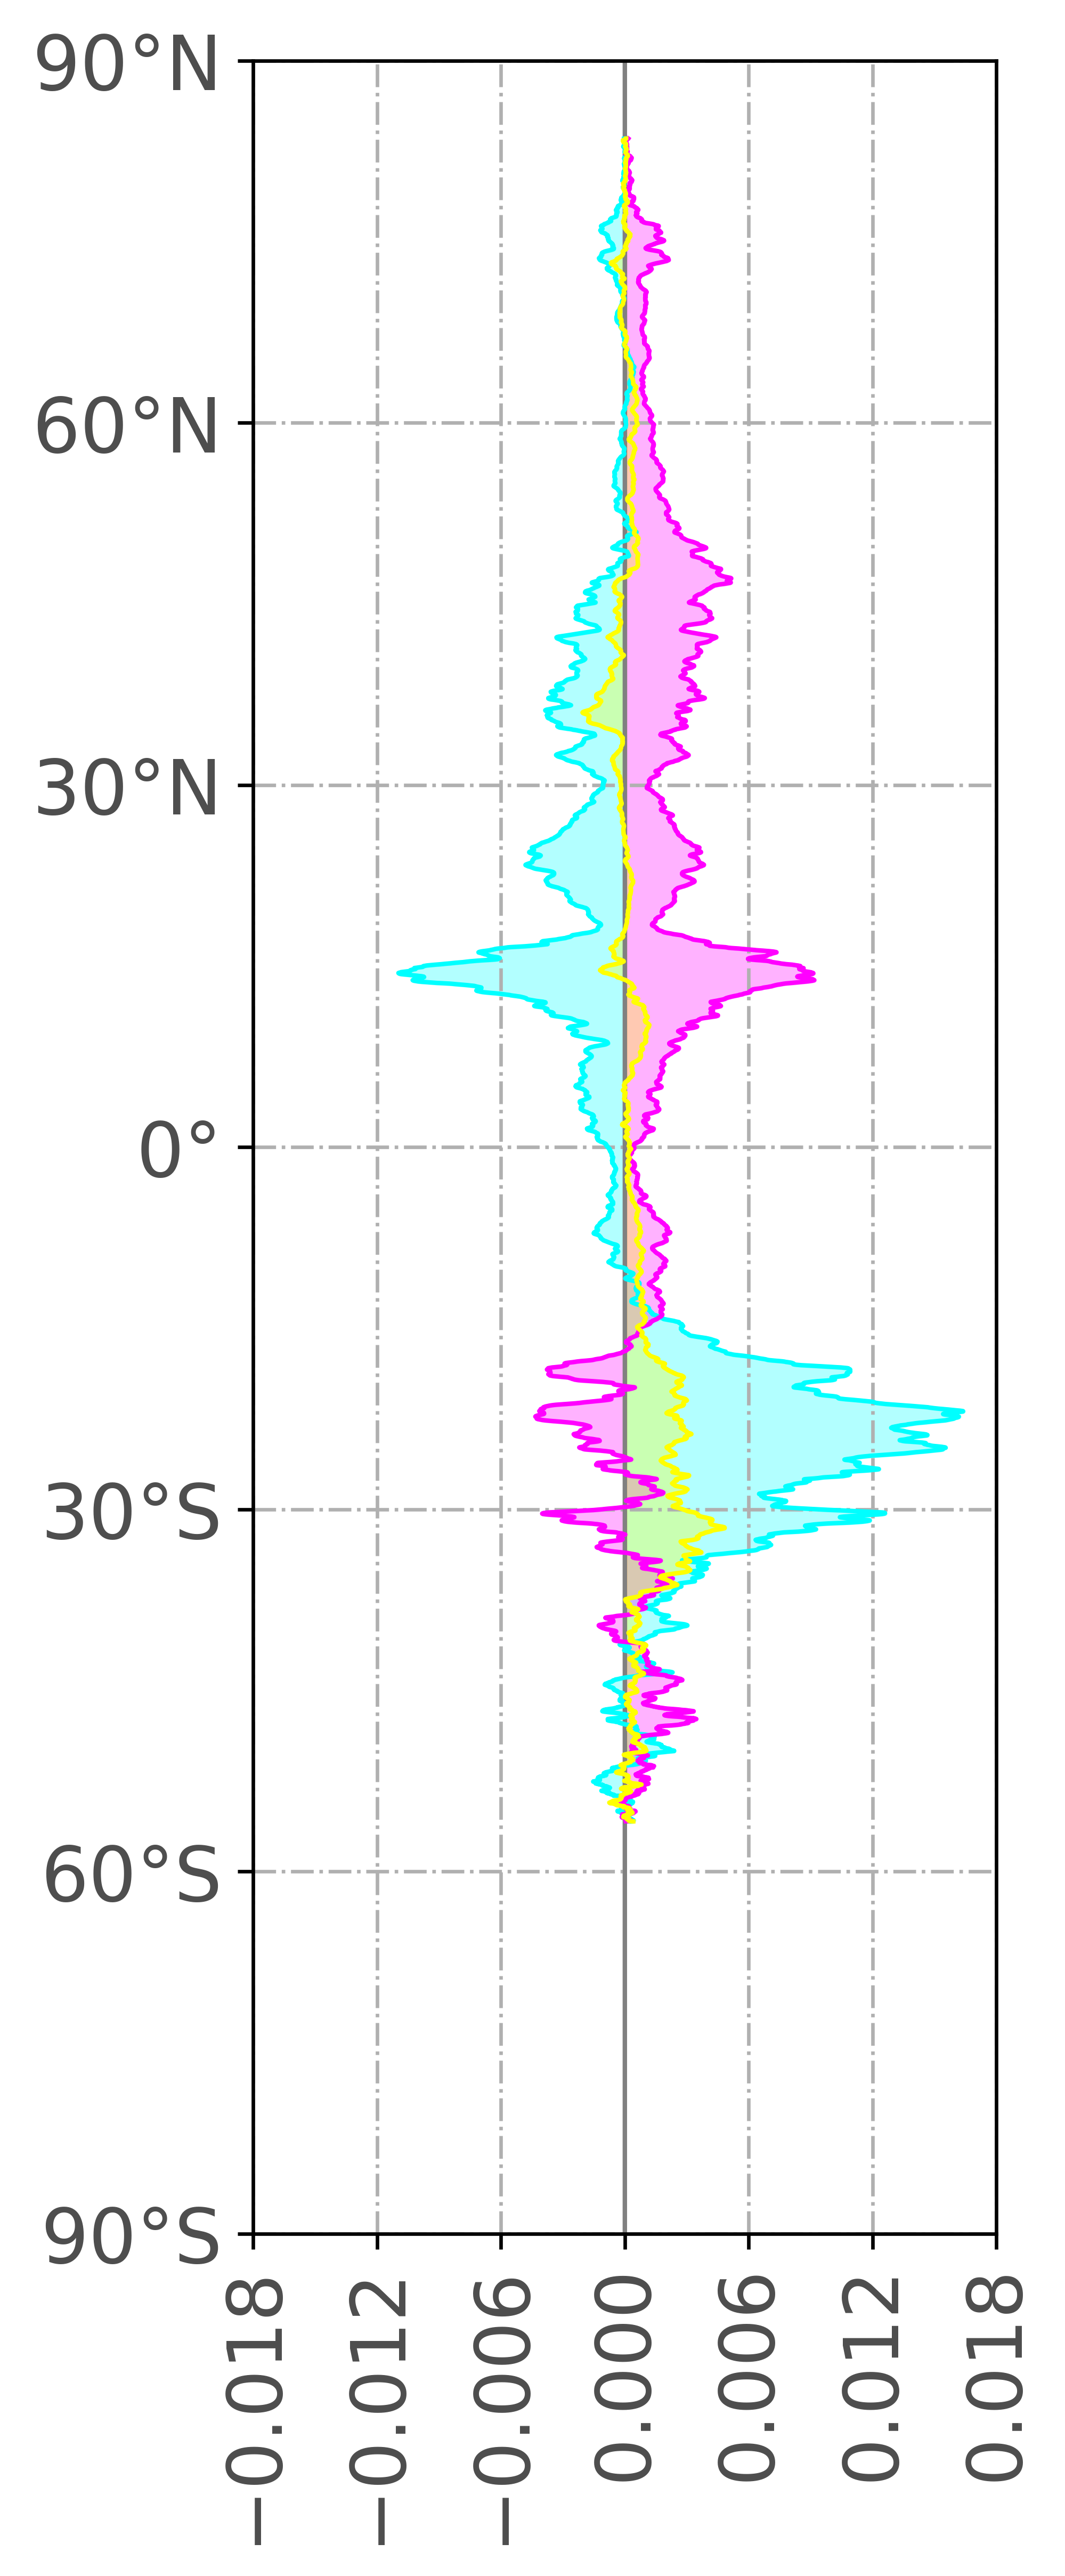

In [3]:
#Distribution across latitude
lc01=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2001_LCCS2_v2.tif').read(1)
lc20=rasterio.open(f'/data2/hzy/albedo2/LCCS/LCCS/2020_LCCS2_v2.tif').read(1)
z=np.ones(lc01.shape)
lc01[lc01==100]=20
lc01[lc01==0]=20
lc20[lc20==100]=20
lc20[lc20==0]=20
z[lc01==20]=0
z[lc20==20]=0
del lc01,lc20
gc.collect()
bb=['NDVI','SSI','NMDI']
dict={}
for i in range(3):
    img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{bb[i]}_final.tif').read(1)
    img[np.isnan(img)]=0
    img[z==0]=np.nan
    img_lat=np.nanmean(img,axis=1)
    dict[bb[i]]=img_lat
plt.figure(figsize=(3,9),dpi=600)
y=np.array([global_trf[3]+global_trf[5]*i for i in range(40076)])
plt.plot([0]*40076,y,linewidth=1,color='gray')
bb_name=['PV','NPV','SWC']
cc=['#00ffff','#ff00ff','#ffff00']
for i in range(3):
    data=dict[bb[i]].copy()
    data[-6610:]=np.nan
    moving_avg = np.convolve(data, np.ones(56) / 56, mode='same')
    plt.plot(moving_avg,y,color=cc[i],linewidth=1,label=bb_name[i])
    plt.fill_betweenx(y,moving_avg,0,color=cc[i],alpha=0.3)
    plt.xlim((-0.018, 0.018))
    plt.ylim((-90, 90))
    plt.yticks([-90+i*30 for i in range(7)],['90°S','60°S','30°S','0°','30°N','60°N','90°N'],fontsize=17,color='#4e4e4e')
    plt.xticks([-0.018+i*0.006 for i in range(7)],rotation=90,fontsize=17,color='#4e4e4e')
plt.grid(linestyle='-.')
plt.savefig('../figure/model_lat_final.pdf',dpi=600,bbox_inches = 'tight')
plt.show()

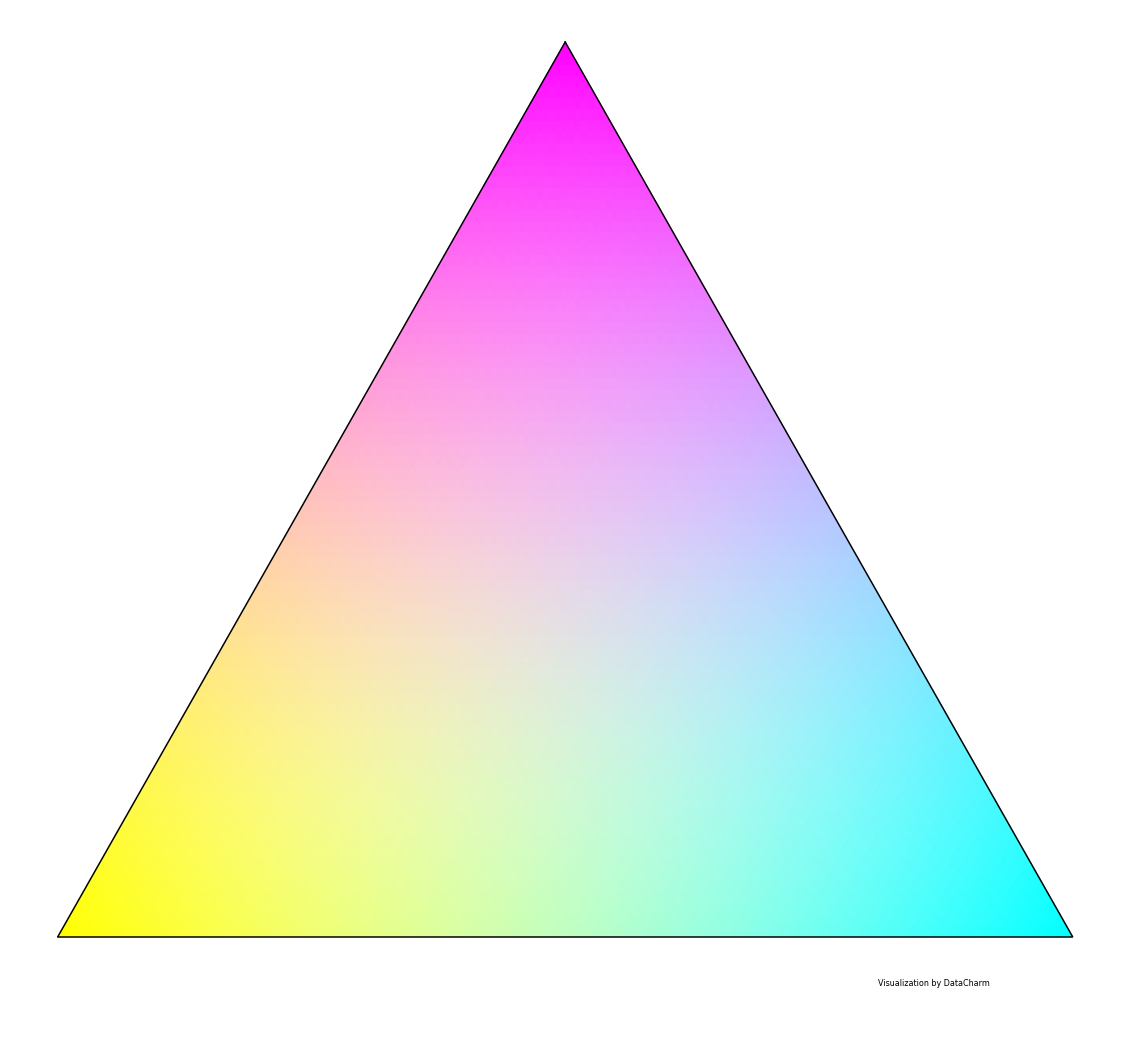

<Figure size 3600x2400 with 0 Axes>

In [ ]:
#legend
def color_point_r(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    k=[1,0,0]
    r1 = math.fabs(w-k[0]*x_color-k[1]*y_color-k[2]*z_color) / w
    g1 = math.fabs(w) / w
    b1 = math.fabs(w) / w
    a1=math.fabs(x_color) / w
    r2 = math.fabs(w) / w
    g2 = math.fabs(w-k[0]*y_color-k[1]*x_color-k[2]*z_color) / w
    b2 = math.fabs(w) / w
    a2=math.fabs(y_color) / w    
    r3 = math.fabs(w) / w
    g3 = math.fabs(w) / w
    b3 = math.fabs(w-k[0]*z_color-k[1]*x_color-k[2]*y_color) / w
    a3=math.fabs(z_color) / w  
    r=r1*a1+r2*a2+r3*a3
    b=b1*a1+b2*a2+b3*a3
    g=g1*a1+g2*a2+g3*a3
    return (r, g, b, 1)

def generate_heatmap_data_r(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point_r(i, j, k, scale)
    return d

fig,ax = plt.subplots()
scale = 80
data_r = generate_heatmap_data_r(scale)
plt.figure(dpi=600)
figure, tax = ternary.figure(scale=scale,ax=ax)
figure.set_size_inches(20, 19)
tax.heatmap(data_r, style="triangular", use_rgba=True, colorbar=False)
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.boundary()
ax.text(.83,.06,'\nVisualization by DataCharm',transform = ax.transAxes,
        ha='center', va='center',fontsize = 8,color='black')
figure.savefig('../figure/triangle.pdf',dpi=600)
plt.show()